In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

In [2]:
# Optato per l'url così da non necessitare del csv in locale e relativo cambio del path.

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

data = pd.read_csv(url)

data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [3]:
data.shape

(429435, 67)

In [4]:
list(data.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [5]:
# Calcolo del numero dei casi da inizio pandemia per continente

casi_continente = data.groupby("continent")["new_cases"].sum()

casi_continente

continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

In [6]:
# Calcolo dei casi totali e relativa suddivisione per continente in percentuale.

casi_totali = casi_continente.sum()

percentuali_per_continente = round((casi_continente/casi_totali)*100,2)

percentuali_per_continente

continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: new_cases, dtype: float64

In [7]:
# Verifica necessaria pre analisi basata sulla data

type(data["date"])

pandas.core.series.Series

In [8]:
# Conversione da series a datetime

data["date"] = pd.to_datetime(data["date"])

In [9]:
# Filtro relativo ai dati dell'Italia nel 2022

casi_it_2022 = data[(data["location"]=="Italy")&(data["date"].dt.year==2022)]

<Axes: xlabel='date'>

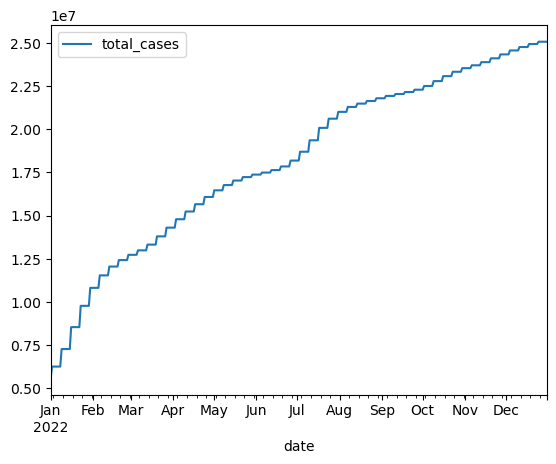

In [10]:
# Crescita dei casi da inizio a fine anno

casi_it_2022.plot(x='date', y='total_cases')

<Axes: xlabel='date'>

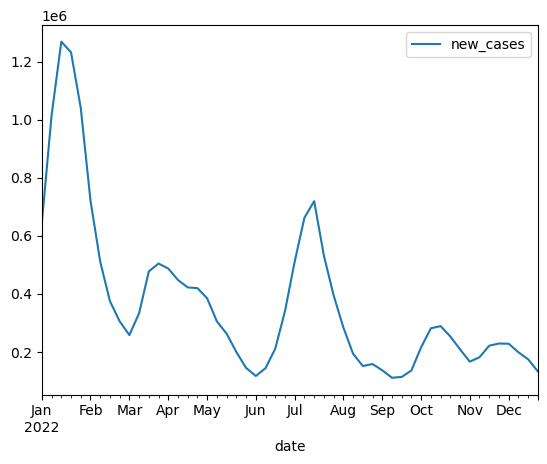

In [11]:
# Nuovi casi filtrati rimuovendo i valori pari a 0

nuovi_casi_it = casi_it_2022[casi_it_2022["new_cases"] > 0]

nuovi_casi_it.plot(x='date', y='new_cases')

<Axes: xlabel='location', ylabel='icu_patients'>

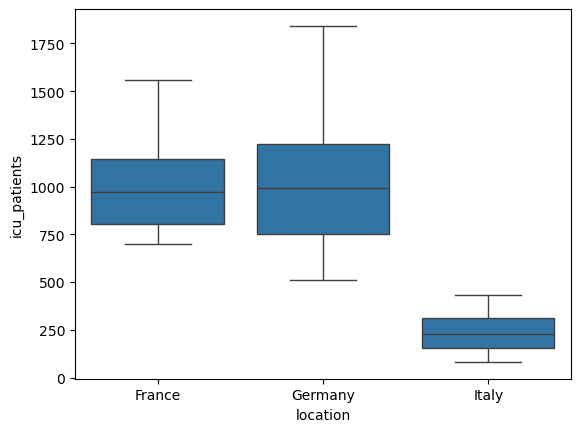

In [12]:
# Creazione del boxplot seguendo le caratteristiche indicate nella consegna

casi_IGF = data[data["location"].isin(["Germany", "Italy", "France"])  & (data["date"] >= "2022-05-01") & (data["date"] <= "2023-04-30")] 

casi_IGF_puliti = casi_IGF.dropna(subset="icu_patients")

sns.boxplot(x="location", y="icu_patients", data=casi_IGF_puliti)

In [13]:
# Germania con una media di pazienti in terapia più alta rispetto agli altri due paesi
# La Francia a seguire con una media leggermente inferiore
# Italia con un numero notevolmente minore rispetto agli altri 2 paesi.

In [14]:
# Somma dei pazienti ospitalizzati per ogni nazione

ospitalizzati_IGF = data[(data["location"].isin(["Germany", "Italy", "France","Spain"])) & (data["date"] .dt.year == 2023)]

totale_ospitalizzati_IGF = ospitalizzati_IGF.groupby("location")["hosp_patients"].sum()

totale_ospitalizzati_IGF

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In [15]:
# totale valori nulli per pazienti ospitalizzati

ospitalizzati_IGF = ospitalizzati_IGF["hosp_patients"].isnull().sum()

ospitalizzati_IGF

np.int64(843)

In [16]:
# I dati nulli potrebbero essere tranquillamente gestiti tramite la sostituzione.
# Non avrebbe comunque alcun senso optare per questa opzione in quanto non avrebbero alcuna valenza ai fini dell'analisi.